# **5.1 Datenvorbereitung - Beispiel 2**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung

* (Facebook Prophet - Zeitreihenvorhersagetool)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.io as io
io.renderers.default='browser'
from scipy import stats
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick über die ersten Zeilen verschaffen

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# *Datensatz google_apps.csv - Metadaten*
---------------------------------------------------

Dieser (Teil-) Datensatz enthält Informationen zu diversen Apps verfügbar für Android im Google Play Store. Der Datensatz gibt einen Überblick über Art der App, Genre, Größe, Anzahl der Installationen, Kunden-feedback, usw. und bietet die Möglichkeit, einen Einblick in den Markt der App-Entwicklung zu erhalten.

Quelle: google play store

# **Attribute:**

* App
* Category
* Rating
* Reviews
* Size
* Installs
* Type
* Price
* Content Rating
* Genres
* Last Updated
* Current Version
* Android Version

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Welche Categories haben die Apps?
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [7]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

App - 0
Category - 0
Rating - 1474
Reviews - 0
Size - 0
Installs - 0
Type - 1
Price - 0
Content Rating - 1
Genres - 0
Last Updated - 0
Current Ver - 8
Android Ver - 3


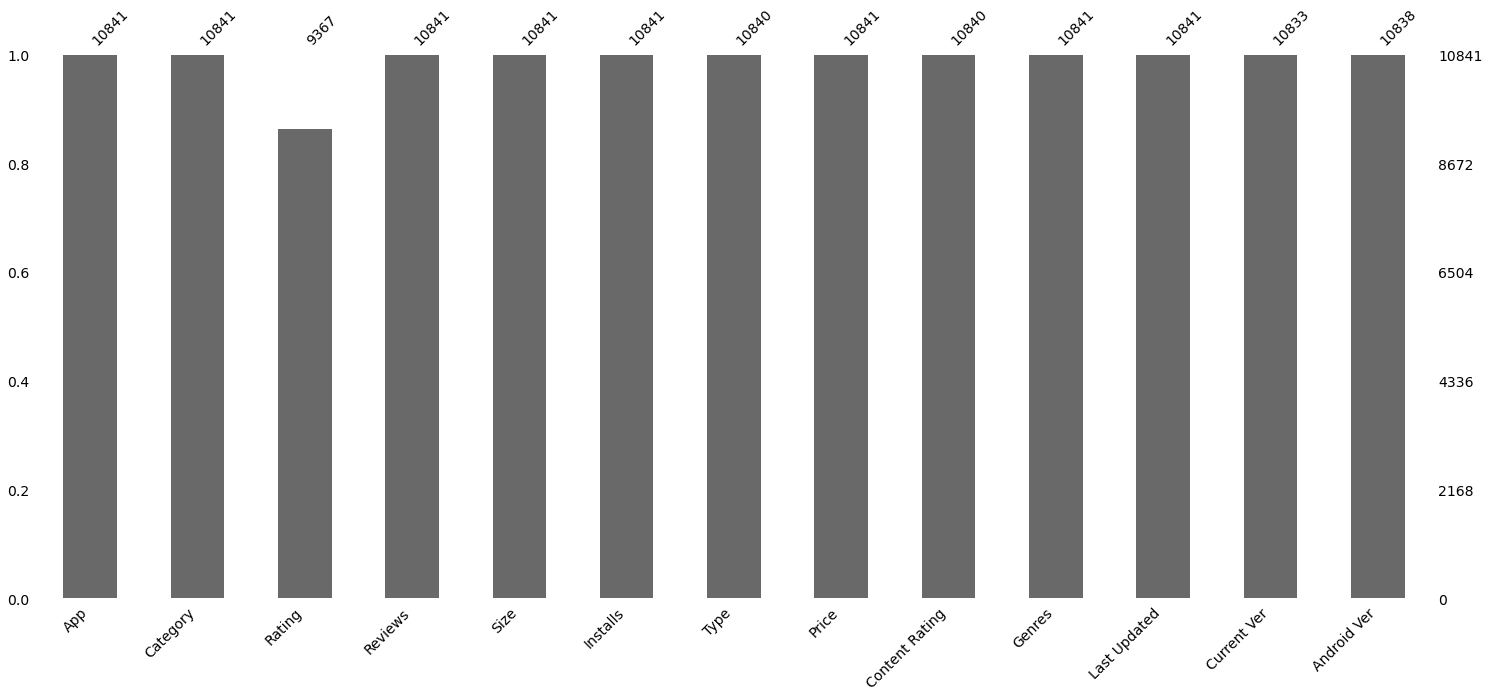

In [8]:
missingno.bar(df, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [9]:
df.duplicated().sum()

483

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [10]:
# Entfernen der Zeilen mit fehlenden Daten
df2 = df.dropna()
df2.shape

(9360, 13)

In [11]:
# Duplikate entfernen
df3 = df2.drop_duplicates()
df3.shape

(8886, 13)

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

--> hier im Datensatz gibt es Probleme mit Zahlen, die als strings (type object) abgelegt sind: 19M, 1000+, $1.99

--> weitere Anpassung notwendig an das Zeitformat (June 20, 2018) mit pandas to_datetime

In [12]:
df3['Size'] = df3.Size.replace("Varies with device",np.nan)
df3['Size'] = df3.Size.str.replace("M","000") # All size values became the kilobyte type.
df3['Size'] = df3.Size.str.replace("k","")
df3['Size'] = df3.Size.replace("1,000+",1000)
df3['Size'] =df3['Size'].astype(float)
df3['Size'].dtype

dtype('float64')

In [13]:
df3['Installs'] = df3.Installs.str.replace(",","")
df3['Installs'] = df3.Installs.str.replace("+","")
df3['Installs'] = df3.Installs.replace("Free",np.nan)
df3['Installs'] = df3['Installs'].astype(float)
df3['Installs'].dtype

dtype('float64')

In [14]:
df3['Price'] = df3.Price.replace("Everyone",np.nan)
df3['Price'] = df3.Price.str.replace("$","").astype(float)
df3['Price'].dtype

dtype('float64')

In [15]:
# super wichtiges Tool zur Umwandlung in beliebige Datums/ Zeitformate
df3['Last Updated'] = pd.to_datetime(df3['Last Updated'])

# Zeit als Index übernehmen
df3.set_index('Last Updated', inplace=True)

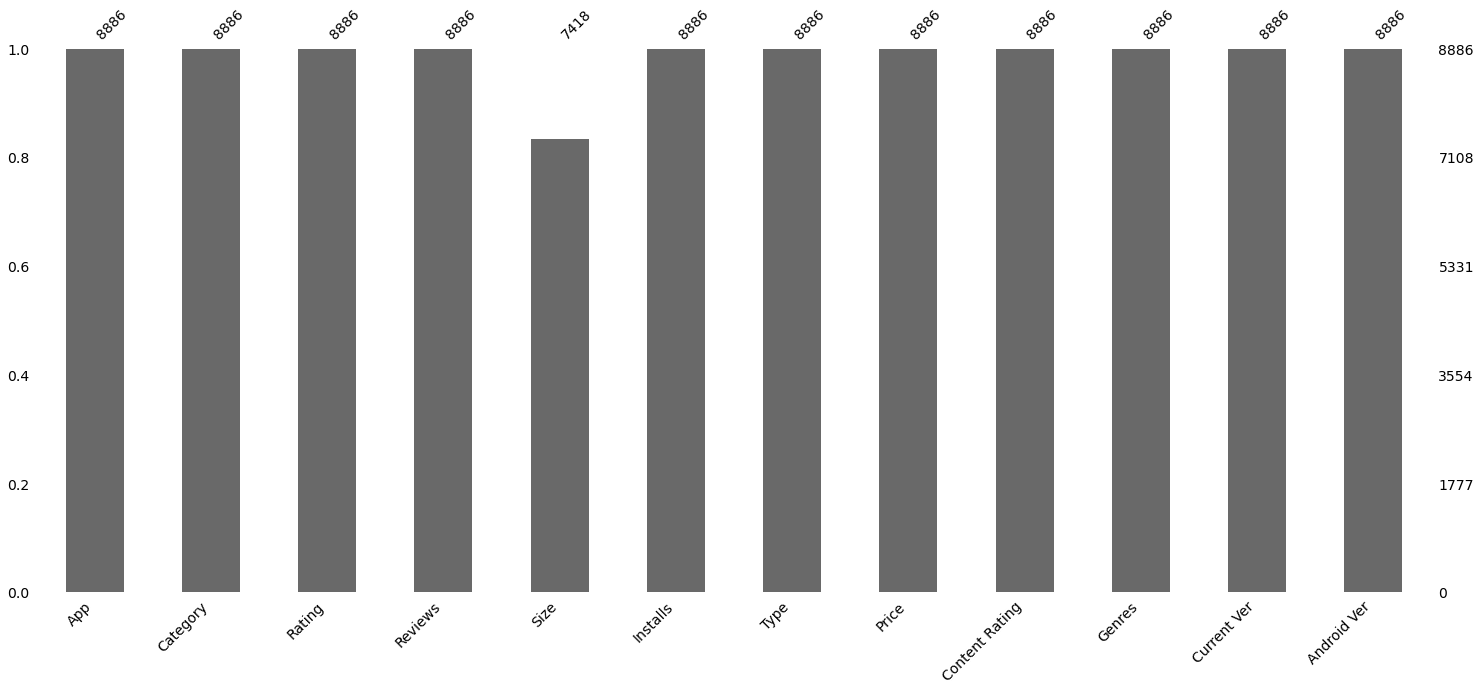

In [16]:
missingno.bar(df3, fontsize = 14)
plt.show()

## g) Erste Übersicht visualisieren

hilfreich zur Bewertung der Datenqualität

In [17]:
df3.describe()

,Rating,Size,Installs,Price
count,8886.000000,7418.000000,8.886000e+03,8886.000000
mean,4.187959,20863.873578,1.650061e+07,0.963526
std,0.522428,24909.471071,8.640413e+07,16.194792
min,1.000000,1.000000,1.000000e+00,0.000000
25%,4.000000,5.900000,1.000000e+04,0.000000
50%,4.300000,14000.000000,5.000000e+05,0.000000
75%,4.500000,33000.000000,5.000000e+06,0.000000
max,5.000000,100000.000000,1.000000e+09,400.000000


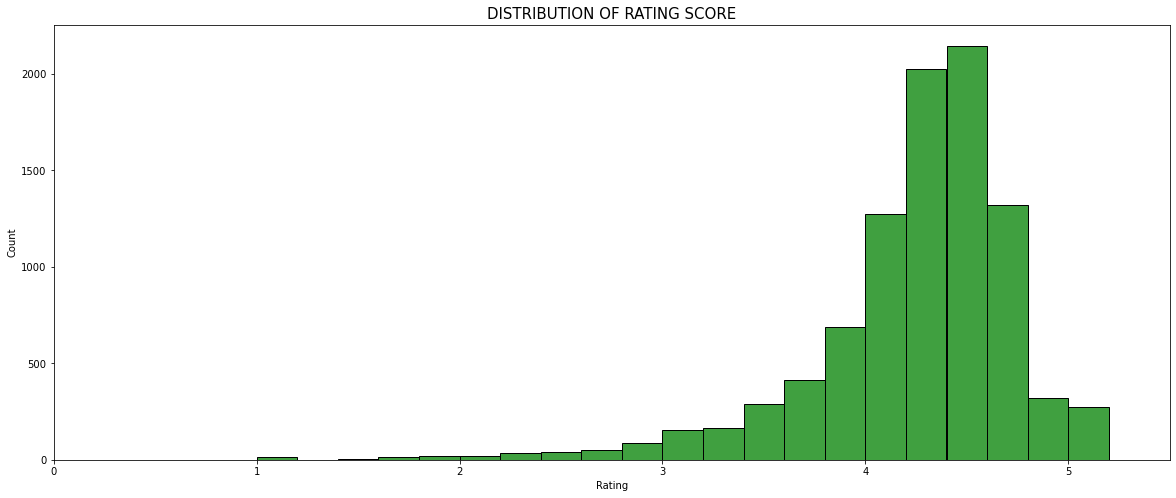

In [20]:
plt.figure(figsize=(20,8))
sns.histplot(df["Rating"], color='green', binwidth=0.2)
plt.xlim(0, 5.5)
plt.title("DISTRIBUTION OF RATING SCORE",fontsize=15)

plt.show()

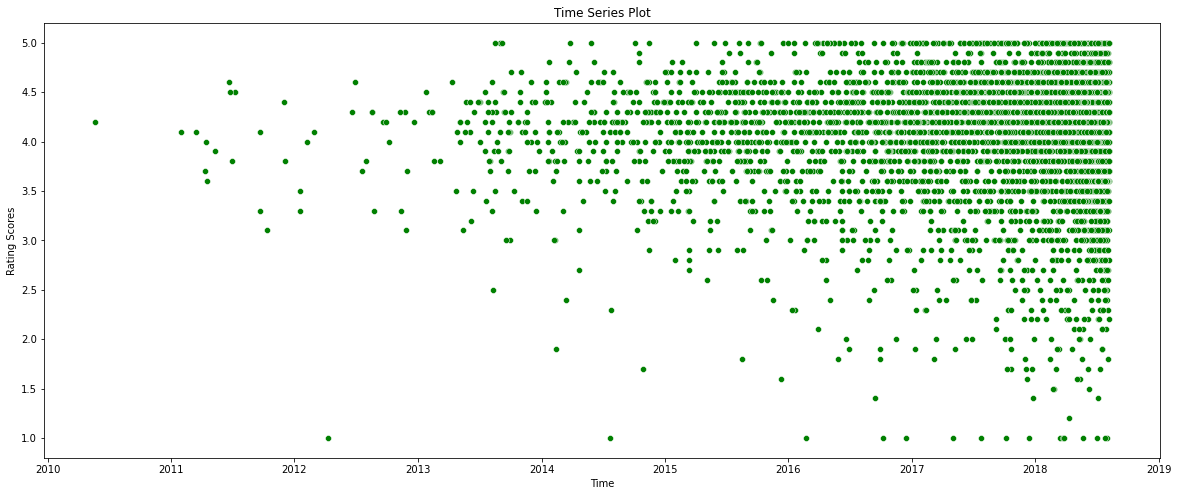

In [21]:
plt.figure(figsize=(20,8))
sns.scatterplot(df3["Rating"], color='green')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Rating Scores')

plt.show()

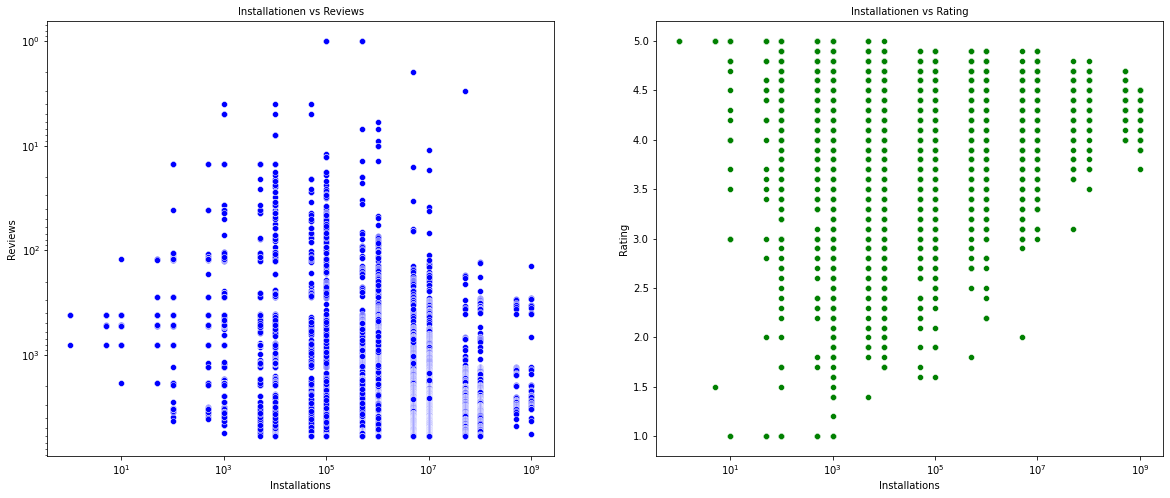

In [24]:
plt.figure(figsize=(20,8))

ax1=plt.subplot(1,2,1)
sns.scatterplot(data=df3, x=df3['Installs'], y=df3['Reviews'], marker='o', color='blue')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.title('Installationen vs Reviews', fontsize=10)
plt.ylabel('Reviews')
plt.xlabel('Installations')

ax2=plt.subplot(1,2,2)
#sns.stripplot(x=df3['Installs'], y=df3['Rating'], data=df3, marker='o', color='green', jitter=0.01)
sns.scatterplot(data=df3, x=df3['Installs'], y=df3['Rating'], marker='o', color='green')
ax2.set_xscale('log')
plt.title('Installationen vs Rating', fontsize=10)
plt.ylabel('Rating')
plt.xlabel('Installations')

plt.show()